<a href="https://colab.research.google.com/github/gadhalekshmip/Credit_Card_Validation/blob/main/Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PACKAGES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


**DATA HANDLING**

In [2]:
df=pd.read_csv('Application_Data.csv')
df.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0.0,0.0,0.0,Security staff ...,2.0,59.0,4.0,0.0,30.0,1.0
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0.0,1.0,1.0,Sales staff ...,1.0,53.0,9.0,0.0,5.0,1.0
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0.0,1.0,1.0,Sales staff ...,1.0,53.0,9.0,0.0,5.0,1.0
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0.0,1.0,1.0,Sales staff ...,1.0,53.0,9.0,0.0,27.0,1.0
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0.0,1.0,1.0,Sales staff ...,1.0,53.0,9.0,0.0,39.0,1.0


**DATA PREPARATION**

In [3]:
df.dropna(inplace=True)
df=df.drop(['Applicant_ID','Applicant_Gender','Income_Type','Education_Type','Family_Status','Housing_Type'],axis=1)

xVars=df.drop(['Status','Job_Title'],axis=1)
yVars=df[['Status']]

xTrain,xValid,yTrain,yValid= train_test_split(xVars,yVars,test_size=0.25, random_state=50 )

print(xTrain.shape)
print(df.shape)
print(xValid.shape)
print(yTrain.shape)
print(yValid.shape)

(5124, 13)
(6832, 15)
(1708, 13)
(5124, 1)
(1708, 1)


In [4]:
print("X-Vars : \n",xVars)
print("Y-Vars : \n",yVars)
print("df : \n",df)

X-Vars : 
       Owned_Car  Owned_Realty  Total_Children  Total_Income  \
0             1             1               0        112500   
1             0             1               0        270000   
2             0             1               0        270000   
3             0             1               0        270000   
4             0             1               0        270000   
...         ...           ...             ...           ...   
6827          1             1               0        315000   
6828          0             0               0        247500   
6829          0             0               0        247500   
6830          0             0               0        247500   
6831          0             0               0        247500   

      Owned_Mobile_Phone  Owned_Work_Phone  Owned_Phone  Owned_Email  \
0                    1.0               0.0          0.0          0.0   
1                    1.0               0.0          1.0          1.0   
2               

**Random Forest**


In [5]:
regressor =RandomForestRegressor(n_estimators=1000,random_state=50 )
regressor.fit(xTrain,yTrain)

<ipython-input-5-47dbbdc867a7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(xTrain,yTrain)


RandomForestRegressor(n_estimators=1000, random_state=50)

**PREDICTION OUTPUT**

In [6]:
y_pred = regressor.predict(xValid)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [7]:
y_pred = pd.DataFrame(y_pred, columns=['y Predict'])
print("y pred : \n",y_pred)
print("y valid : \n",yValid)

y pred : 
       y Predict
0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
...         ...
1703        1.0
1704        1.0
1705        1.0
1706        1.0
1707        1.0

[1708 rows x 1 columns]
y valid : 
       Status
3128     1.0
5354     1.0
6365     1.0
2889     1.0
4842     1.0
...      ...
4048     1.0
1187     1.0
6390     1.0
3299     1.0
2307     1.0

[1708 rows x 1 columns]


**GRAPH PLOT**

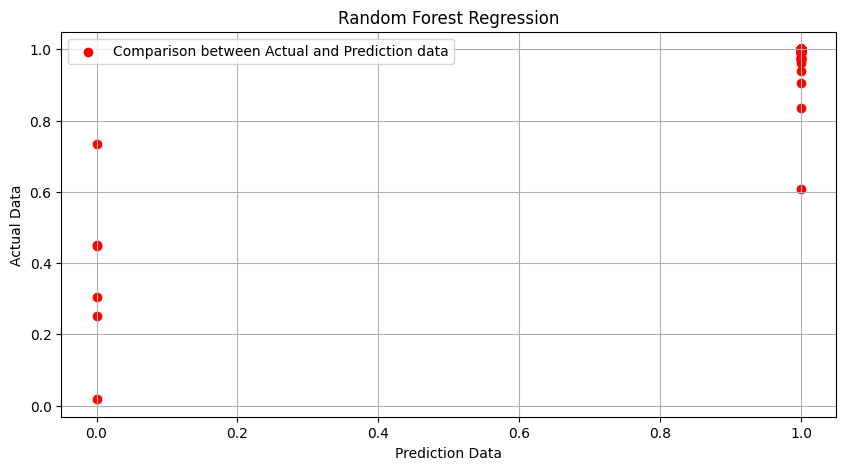

In [8]:
plt.figure(figsize = (10,5))
plt.scatter(yValid, y_pred, color='red', label='Comparison between Actual and Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

**EVALUATION**

In [9]:
metrics.r2_score(yValid, y_pred)

0.7821677814336075

**PREDICTING LABEL FOR NEW USER**

In [12]:
new_user_data = {}
print("Enter data of the new user to predict\n")
user_data = pd.DataFrame(columns=[column for column in xVars.columns])

for column in user_data.columns:
  value = int(input(f"Enter value for {column} : "))
  new_user_data[column] = value

# Use the loc method to add the new row to the DataFrame
user_data.loc[len(user_data)] = new_user_data
  
print("\nUser_data : \n\n",user_data)
user_pred = regressor.predict(user_data)
print("\nThe predicted status for the user is : ",user_pred[user_pred.argmax()])

Enter data of the new user to predict

Enter value for Owned_Car : 1
Enter value for Owned_Realty : 1
Enter value for Total_Children : 2
Enter value for Total_Income : 100000
Enter value for Owned_Mobile_Phone : 1
Enter value for Owned_Work_Phone : 1
Enter value for Owned_Phone : 1
Enter value for Owned_Email : 1
Enter value for Total_Family_Members : 2
Enter value for Applicant_Age : 35
Enter value for Years_of_Working : 10
Enter value for Total_Bad_Debt : 1
Enter value for Total_Good_Debt : 5

User_data : 

    Owned_Car  Owned_Realty  Total_Children  Total_Income  Owned_Mobile_Phone  \
0          1             1               2        100000                   1   

   Owned_Work_Phone  Owned_Phone  Owned_Email  Total_Family_Members  \
0                 1            1            1                     2   

   Applicant_Age  Years_of_Working  Total_Bad_Debt  Total_Good_Debt  
0             35                10               1                5  

The predicted status for the user is : 